In [ ]:
import numpy as np

In [ ]:
res = 1e3
def calc_vout(res):
    i2 = 500e-9
    i1 = 0.5/res
    vout = 0.375*np.log10(i1/i2)+2
    return vout
vout = calc_vout(res)


In [ ]:
from scipy.interpolate import interp1d

In [ ]:
ress = np.logspace(1,10,1000)
vs = calc_vout(ress)
res_by_v = interp1d(vs, ress)
res_by_v(2.724)-10000

def get_res(v):
    return res_by_v(v)-10000
    

In [ ]:
import serial
ser = serial.Serial('/dev/ttyUSB0', baudrate = 115200, timeout=0.5)

In [ ]:
import json
import pandas as pd
def get_new_data():
    ser.flushInput()
    #print(ser.readline())
    try:
        data = json.loads(ser.readline().strip().decode())
        
        return data
    except KeyboardInterrupt:
        raise
    except:
        pass

dF = pd.DataFrame()

In [ ]:
while True:
    
    data = pd.Series(get_new_data())
    data.name = pd.datetime.utcnow()
    dF = dF.append(data)


In [ ]:
%pylab inline

In [ ]:
fig, axes = subplots(2, sharex=True)
dF['res'] = dF['logamp'].apply(get_res)
axe = axes[0]
axe.plot(dF['res'])
axe.set_yscale('log')

axe = axes[1]
axe.plot(dF['heater'])


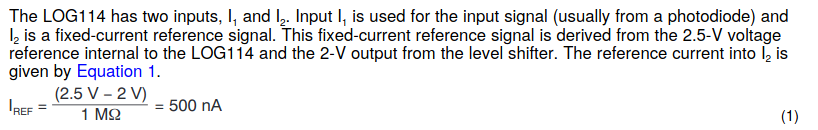

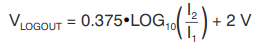

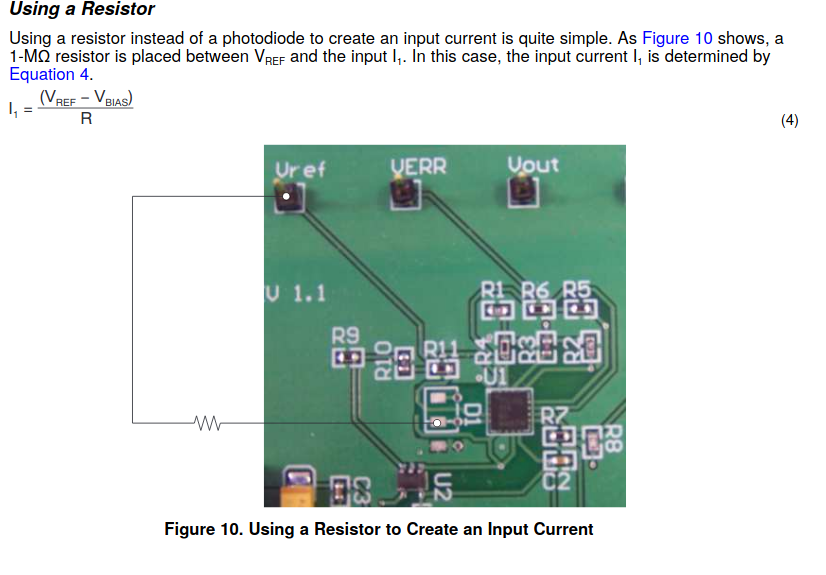